In [3]:
### Load some packages 

import networkx as nx # for handling graphs/networks 
import numpy as np # for basic scientific computing 
import pandas as pd # for basic scientific computing 
import matplotlib.pyplot as plt # for plotting
import matplotlib.gridspec as gridspec
from scipy.special import binom
from scipy.integrate import solve_ivp
import Koopman_source as kp
#import csv


In [5]:
c = [2,3,1]
print(kp.list2onehot(c))

[[0 1 0]
 [0 0 1]
 [1 0 0]]


In [6]:
a = 0.8
b = 0.0
W = b * np.ones([2,2]) + (a-b) * np.eye(2)
# W = np.array([[0.5, 0.1, 0.1], [0.1, 0.5, 0.1], [0.1, 0.1, 0.5]])
print(W)

c = [0]*20 + [1]*80
print(c)
C = kp.list2onehot(c, list_classes=[i for i in range(2)])
# C = (n x n) probability matrix = expected adjacency matrix = C W C.T
P1 = C @ W @ C.T
#plt.imshow(P.todense())
#print(P)
Q1 = np.zeros([100,100])
Q2 = np.zeros([100,100])
for i in range(20,100):
    for j in range(20):
        Q1[i,j] = 0.5

for i in range(20):
    for j in range(20,100):
        Q2[i,j] = 0.01


P2 = P1 + Q1
P3 = P2 + Q2
G1 = kp.weight2digraph(P1)
G2 = kp.weight2digraph(P2)
G3 = kp.weight2digraph(P3)

[[0.8 0. ]
 [0.  0.8]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


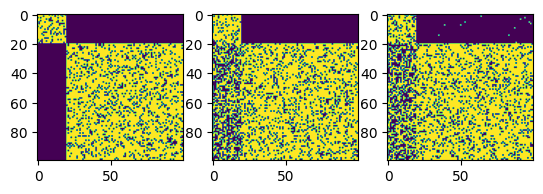

In [7]:
A1 = nx.adjacency_matrix(G1, nodelist=list(G1.nodes()))
#plt.imshow(A1.todense())
A2 = nx.adjacency_matrix(G2, nodelist=list(G2.nodes()))
#plt.imshow(A2.todense())
A3 = nx.adjacency_matrix(G3, nodelist=list(G3.nodes()))

# print(type(A1))

plt.subplot(131)
plt.imshow(A1.todense())
plt.subplot(132)
plt.imshow(A2.todense())
plt.subplot(133)
plt.imshow(A3.todense())


In [8]:
## Toy example - Proof of concept
h1 = kp.RW(G1, x0 = None, steps = 500, return_history = True)
#plt.plot(h1)
h2 = kp.RW(G2, x0 = None, steps = 500, return_history = True)
#plt.plot(h2)
h3 = kp.RW(G3, x0 = None, steps = 500, return_history = True)


(0.0, 105.0)

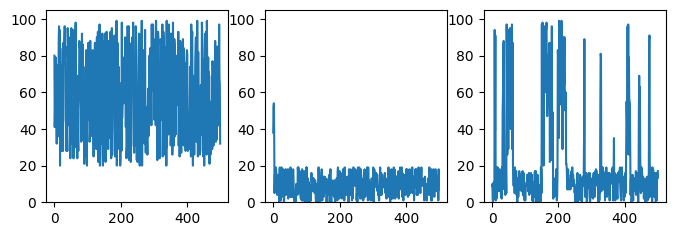

In [9]:
plt.figure(figsize = (8, 2.5))
plt.subplot(131)
plt.plot(h1)
plt.ylim([0,105])
plt.subplot(132)
plt.ylim([0,105])
plt.plot(h2)
plt.subplot(133)
plt.plot(h3)
plt.ylim([0,105])

In [11]:
## Toy example from the Steven's note

# Dynamical system
# \dot{x}_1 = \mu x_1
# \dot{x}_2 = \lambda (x_2 - x_1^2)

# A three-dimensional linear Koopman system with y_1 = x_1, y_2 = x_2, y_3 = x_1^2.
# \dot{y}_1 = \mu y_1
# \dot{y}_2 = \lambda (y_2 - y_3)
# \dot{y}_3 = \mu (y_3)
def toy_c1(t, x, mu0, lambda0): # Here, c1 stands for the first continuous example.
    #mu0, lambda0 = kappa[0], kappa[1]
    dx = np.zeros([2])
    #dx = [mu0 * x[0], lambda0 * (x[0] - np.power(x[1], 2))]
    dx[0] = mu0 * x[0]
    dx[1] = lambda0 * (x[1] - np.power(x[0], 2))
    return dx

def toy_c1_Koop(t, y, mu0, lambda0):
    #mu0, lambda0 = kappa[0], kappa[1]
    dy = np.zeros([3])
    dy[0] = mu0 * y[0]
    dy[1] = lambda0 * (y[1] - y[2])
    dy[2] = 2 * mu0 * y[2]
    return dy



In [12]:
x=np.zeros([2,10])
x0 = np.ones([2])
#x.shape[0]
x[:,2] = x0
#print(x[:,2])
print(x0)
print(x)

[1. 1.]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


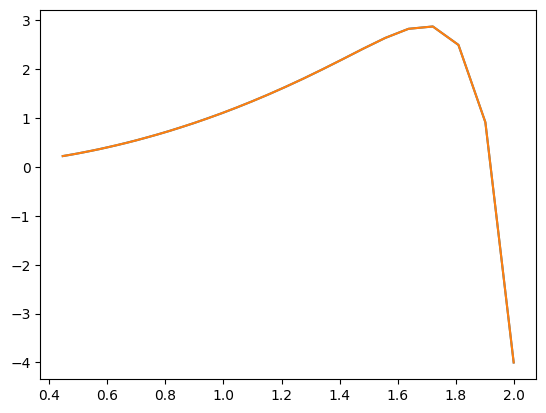

In [13]:
tspan1 = (0.0, 30.0)
t_eval = np.arange(tspan1[0], tspan1[1]+1, 1)
x_init = [2,-4]
#x_init = np.random.uniform(low=4, high=6, size=2)
y_init = [x_init[0], x_init[1], np.power(x_init[0],2)]
#kappa1 = np.random.uniform(low=[,3], high=[3,5], size=2)
kappa1 = [-0.05, -1]

sol_c1 = solve_ivp(toy_c1, tspan1, x_init, args = kappa1, method='RK45', t_eval = t_eval)
sol_c1_Koop = solve_ivp(toy_c1_Koop, tspan1, y_init, args = kappa1, method='RK45', t_eval=t_eval) 
#plt.plot(sol1.t, sol1.y[0])
plt.plot(sol_c1.y[0], sol_c1.y[1])
plt.plot(sol_c1_Koop.y[0], sol_c1_Koop.y[1])


In [14]:
def toy_d1(t, x0, mu0, lambda0): # Here, d1 stands for the first discrete example.
    # t must be a positive integer.
    # x0 is the initial value x(0) = x0
    #mu0, lambda0 = kappa[0], kappa[1]
    x_mat = np.zeros([len(x0),t]) # matrix for saving trajectories. It does not save the initial value.
    x_old = x0.copy()
    x_new = x_old
    for i in range(t):
        x_new[0] = (1+mu0)*x_old[0]
        x_new[1] = (1+lambda0)*x_old[1]
        x_mat[:,i] = x_new
    return x_mat

def toy_d1_F(x_old, mu0, lambda0):
    x_new = x_old.copy()
    x_new[0] = (1+mu0)*x_old[0]
    x_new[1] = (1+lambda0)*x_old[1]
    return x_new

def toy_d2_F(x_old, mu0, lambda0):
    x_new = x_old.copy()
    x_new[0] = (1+mu0)*x_old[0]
    x_new[1] = (1+lambda0)*x_old[1] - lambda0 * np.power(x_old[0],2)
    return x_new

def toy_d2_Koopman(x_old, mu0, lambda0):
    x_new = x_old.copy()
    x_new[0] = (1+mu0)*x_old[0]
    x_new[1] = (1+lambda0)*x_old[1] - lambda0 * x_old[2]
    x_new[2] = np.power((1+mu0), 2)*x_old[2]
    return x_new

def psi_id(x):
    return x
    
def psi_d1(x):
    return x

def psi_d2(x):
    obs = np.zeros(9) # 20 = the total number of observable functions, psi_m's.
    idx = 0 
    for i in range(1,4):
        for j in range(i+1):
            obs[idx] = np.power(x[0], i-j) * np.power(x[1], j)
            idx += 1
    return obs

def psi_d2_ans(x):
    obs = np.zeros(3) # = the total number of observable functions, psi_m's.
    obs[0] = x[0]
    obs[1] = x[1]
    obs[2] = np.power(x[0],2)
    
    return obs
            

In [15]:
## Compute a Koopman matrix from simulated data.
mu0 = -0.1
lambda0 = -0.2

K_true = [[1+mu0, 0], [0, 1+lambda0]]
#x0 = [2,1]

d = 2 # the number of variables (=the dimension) of the original dynamical system.
#M = 100 # the number of observed data. 
M_max = 1000 # the number of observed data. 
N = 9 # the total number of observable functions, psi_m's. 

K_approx = np.zeros([N,N,M_max])
G_approx = np.zeros([N,N,M_max])
G_pinv = np.zeros([N,N,M_max])
A_approx = np.zeros([N,N,M_max])

for M in range(1,M_max+1):

    #x_mat_pre = np.random.default_rng().exponential(scale=1, size=[d,M])
    x_mat = np.random.default_rng().exponential(scale=1, size=[d,M])
    #x_mat = np.concatenate((x_mat_pre, np.reshape(np.power(x_mat_pre[0,:],2), (1,-1))), axis=0)
    #x_mat = np.random.default_rng().exponential(scale=1, size=[N,M])
    y_mat = np.zeros([d,M])

    for i in range(M):
        y_mat[:,i] = toy_d2_F(x_mat[:,i], mu0, lambda0)

    psi_X = np.zeros([M,N])
    psi_Y = np.zeros([M,N])
    for i in range(M):
        psi_X[i,:] = psi_d2(x_mat[:,i])
        psi_Y[i,:] = psi_d2(y_mat[:,i])

    G_approx[:,:,M-1] = 1/M * np.matmul(psi_X.transpose(), psi_X) # N x N matrix
    A_approx[:,:,M-1] = 1/M * np.matmul(psi_X.transpose(), psi_Y) # N x N matrix
    
    G_pinv[:,:,M-1] = np.linalg.pinv(G_approx[:,:,M-1]) # N x N matrix
    K_approx[:,:,M-1] = np.matmul(G_pinv[:,:,M-1], A_approx[:,:,M-1]).transpose()  # N x N matrix


In [17]:
# This block of codes is for the 2-dimensional K matrix array.

P_bool = np.absolute(K_approx) > 1e-2
P = P_bool.astype(int) # this matrix considered as the edge probability matrix to obtain a directed graph. 
G = weight2digraph(P)
A = nx.adjacency_matrix(G, nodelist=list(G.nodes()))

# print(type(A1))
rw1 = RW(G, x0 = 0, steps = 500, return_history = True)
rw1.insert(0,0)
rw2 = RW(G, x0 = 1, steps = 500, return_history = True)
rw2.insert(0,1)

fig, ax = plt.subplots(1, 3, figsize = (10,4))
fig.tight_layout(pad=3.0)
ax[0].imshow(A.todense());
ax[0].set_xticks(np.arange(0, N),[str(x) for x in np.arange(1, N+1)]);
ax[0].set_yticks(np.arange(0, N),[str(x) for x in np.arange(1, N+1)]);
ax[0].set_xlabel('Nodes');
ax[0].set_ylabel('Nodes');
ax[0].set_title('Adjacency matrix');

ax[1].plot(rw1)
ax[1].set_yticks(np.arange(0, N),[str(x) for x in np.arange(1, N+1)]);
ax[1].set_ylim([-0.5, 8.5]);
ax[1].set_xlabel('Step');
ax[1].set_ylabel('Node');
ax[1].set_title('RW starting at Node 1');

ax[2].plot(rw2)
ax[2].set_yticks(np.arange(0, N),[str(x) for x in np.arange(1, N+1)]);
ax[2].set_ylim([-0.5, 8.5]);
ax[2].set_xlabel('Step');
ax[2].set_ylabel('Node');
ax[2].set_title('RW starting at Node 2');
#plt.savefig('Results_9obs.png')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

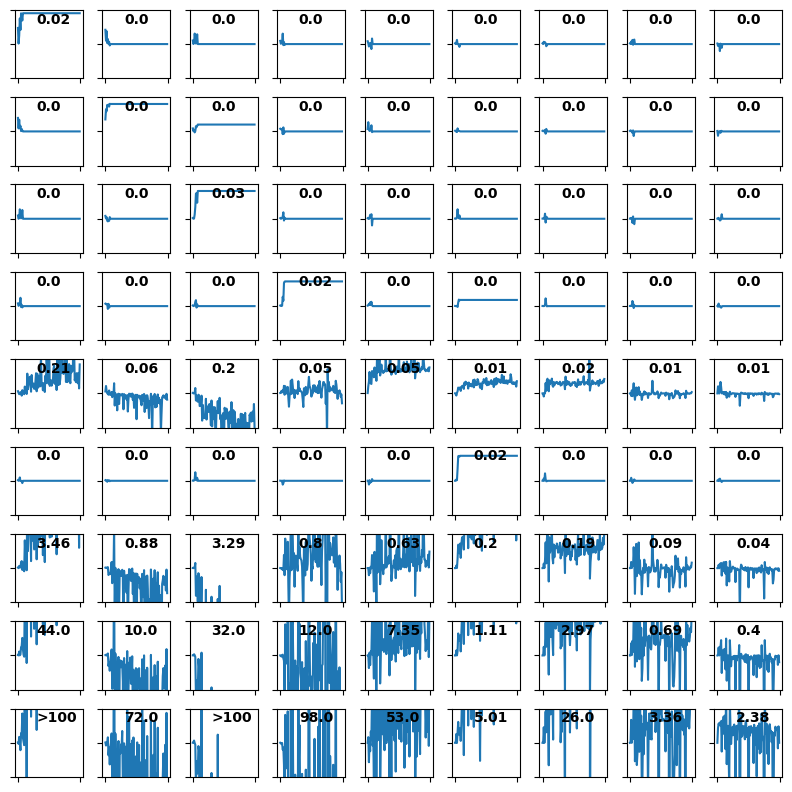

In [57]:
# This block of codes is for the 3-dimensional K matrix array.

# Draw the evolution of each entry in the Koopman matrix approximated with increasing number of data from 1 to 100.
K_tmp = K_approx[:,:,0] # current approximation. We keep updating this matrix. 

iter_range = range(100)
# i_list = [0,1,2]
# j_list = [0,1,2]
i_list = range(9)
j_list = range(9)
ylim0 = [-1, 1]

var_mat = np.zeros([N,N])
fig2, ax2 = plt.subplots(len(i_list), len(j_list), figsize = (8,8))
#fig2.tight_layout(pad=3.0)
for i in i_list:
    for j in j_list:
        ax2[i,j].plot(iter_range,K_approx[i,j,iter_range])
        ax2[i,j].set_ylim(ylim0)
        ax2[i,j].set_xticklabels('')
        ax2[i,j].set_yticklabels('')
        
        if np.var(K_approx[i,j,iter_range]) < 9.5:
            var_mat[i,j] = round(np.var(K_approx[i,j,iter_range]), 2)
        else:
            var_mat[i,j] = round(np.var(K_approx[i,j,iter_range]))
        
        if var_mat[i,j] < 100:
            ax2[i,j].text(0.3*np.max(iter_range), 0.8*ylim0[1] + 0.2*ylim0[0], str(var_mat[i,j]),weight="bold")
        else:
            ax2[i,j].text(0.3*np.max(iter_range), 0.8*ylim0[1] + 0.2*ylim0[0], '>100',weight="bold")
        
fig2.tight_layout(pad=1.0)
plt.savefig('K_approx.png')

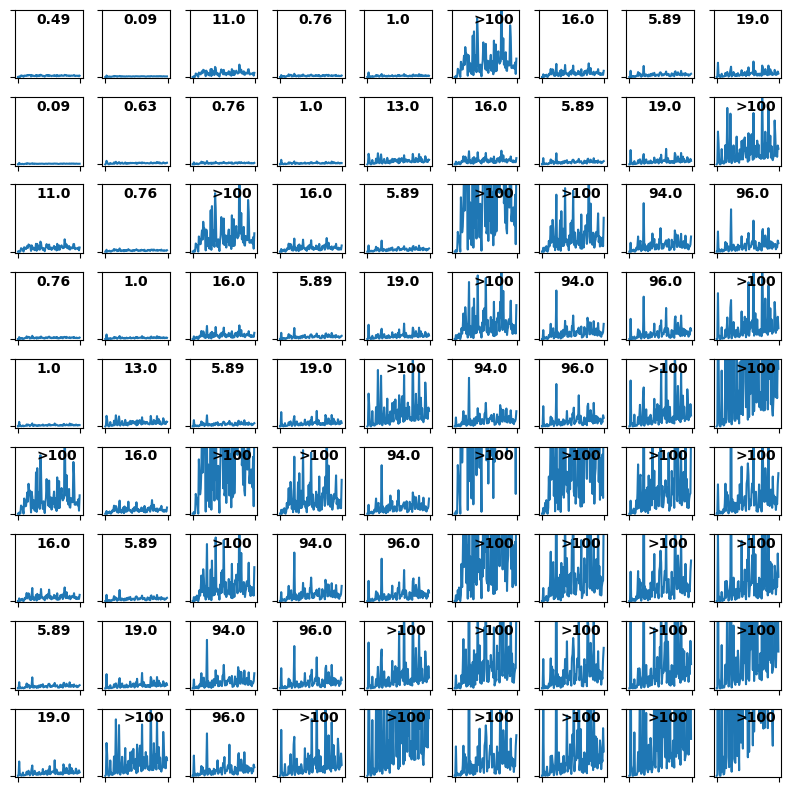

In [58]:
# This block of codes is for the 3-dimensional K matrix array.

# Draw the evolution of each entry in the Koopman matrix approximated with increasing number of data from 1 to 100.
K_tmp = K_approx[:,:,0] # current approximation. We keep updating this matrix. 

iter_range = range(100)
# i_list = [0,1,2]
# j_list = [0,1,2]
i_list = range(9)
j_list = range(9)
ylim0 = [-2, 100]

var_mat = np.zeros([N,N])
fig3, ax3 = plt.subplots(len(i_list), len(j_list), figsize = (8,8))
#fig2.tight_layout(pad=3.0)
for i in i_list:
    for j in j_list:
        ax3[i,j].plot(iter_range,G_approx[i,j,iter_range])
        ax3[i,j].set_ylim(ylim0)
        ax3[i,j].set_xticklabels('')
        ax3[i,j].set_yticklabels('')
        
        if np.var(G_approx[i,j,iter_range]) < 9.5:
            var_mat[i,j] = round(np.var(G_approx[i,j,iter_range]), 2)
        else:
            var_mat[i,j] = round(np.var(G_approx[i,j,iter_range]))
        
        if var_mat[i,j] < 100:
            ax3[i,j].text(0.3*np.max(iter_range), 0.8*ylim0[1] + 0.2*ylim0[0], str(var_mat[i,j]),weight="bold")
        else:
            ax3[i,j].text(0.3*np.max(iter_range), 0.8*ylim0[1] + 0.2*ylim0[0], '>100',weight="bold")

fig3.tight_layout(pad=1.0)
plt.savefig('G_approx.png')

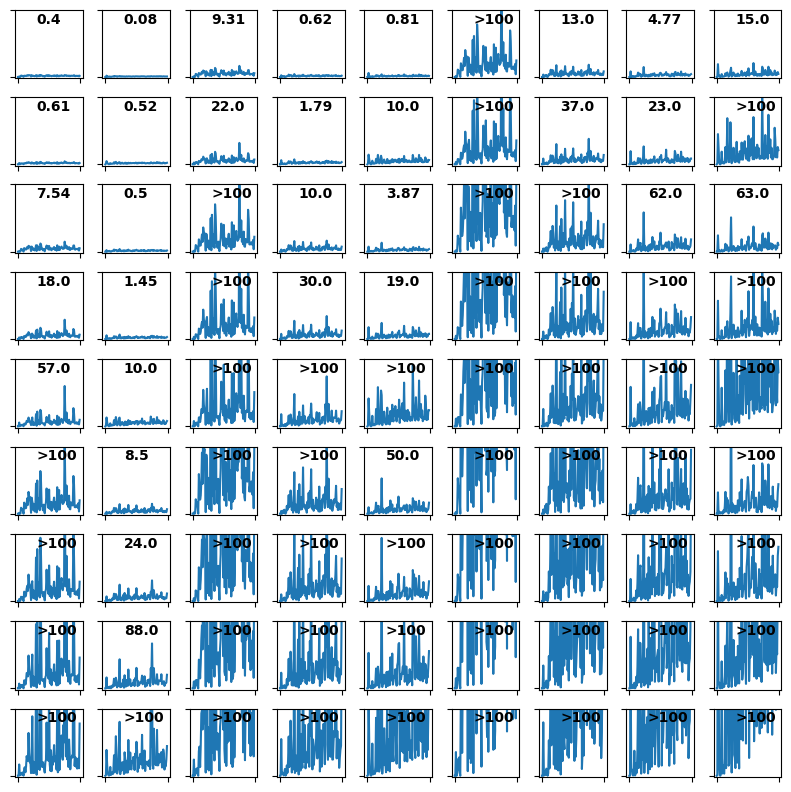

In [61]:
# This block of codes is for the 3-dimensional K matrix array.

# Draw the evolution of each entry in the Koopman matrix approximated with increasing number of data from 1 to 100.
K_tmp = K_approx[:,:,0] # current approximation. We keep updating this matrix. 

iter_range = range(100)
# i_list = [0,1,2]
# j_list = [0,1,2]
i_list = range(9)
j_list = range(9)
ylim0 = [-2, 100]

var_mat = np.zeros([N,N])
fig4, ax4 = plt.subplots(len(i_list), len(j_list), figsize = (8,8))
#fig2.tight_layout(pad=3.0)
for i in i_list:
    for j in j_list:
        ax4[i,j].plot(iter_range,A_approx[i,j,iter_range])
        ax4[i,j].set_ylim(ylim0)
        ax4[i,j].set_xticklabels('')
        ax4[i,j].set_yticklabels('')
        
        if np.var(A_approx[i,j,iter_range]) < 9.5:
            var_mat[i,j] = round(np.var(A_approx[i,j,iter_range]), 2)
        else:
            var_mat[i,j] = round(np.var(A_approx[i,j,iter_range]))
        
        if var_mat[i,j] < 100:
            ax4[i,j].text(0.3*np.max(iter_range), 0.8*ylim0[1] + 0.2*ylim0[0], str(var_mat[i,j]),weight="bold")
        else:
            ax4[i,j].text(0.3*np.max(iter_range), 0.8*ylim0[1] + 0.2*ylim0[0], '>100',weight="bold")
        
fig4.tight_layout(pad=1.0)
plt.savefig('A_approx.png')

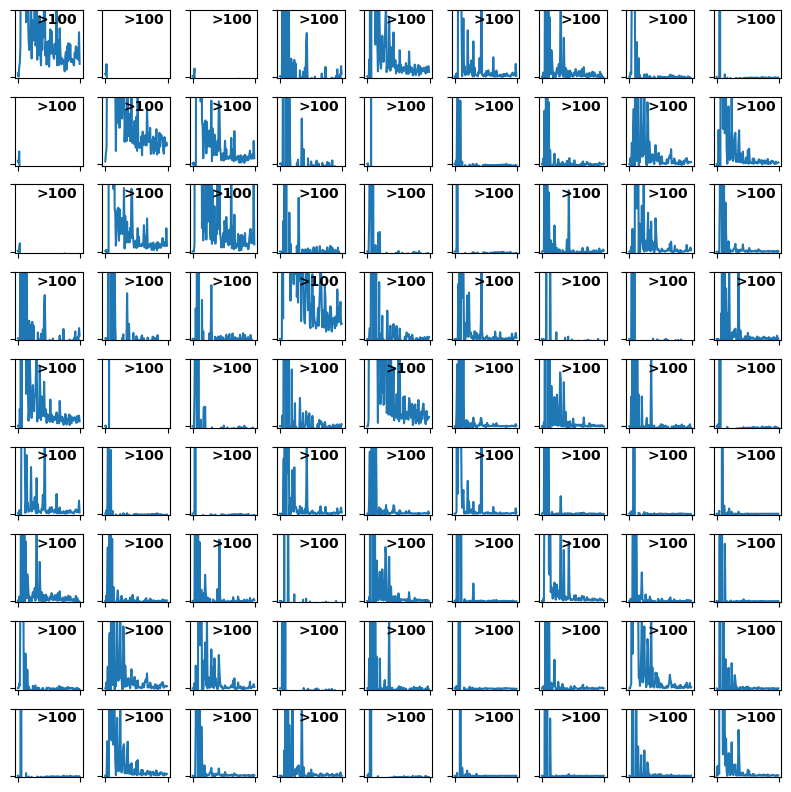

In [62]:
# This block of codes is for the 3-dimensional K matrix array.

# Draw the evolution of each entry in the Koopman matrix approximated with increasing number of data from 1 to 100.
K_tmp = K_approx[:,:,0] # current approximation. We keep updating this matrix. 

iter_range = range(100)
# i_list = [0,1,2]
# j_list = [0,1,2]
i_list = range(9)
j_list = range(9)
ylim0 = [-2, 100]

var_mat = np.zeros([N,N])
fig5, ax5 = plt.subplots(len(i_list), len(j_list), figsize = (8,8))
#fig2.tight_layout(pad=3.0)
for i in i_list:
    for j in j_list:
        ax5[i,j].plot(iter_range,G_pinv[i,j,iter_range])
        ax5[i,j].set_ylim(ylim0)
        ax5[i,j].set_xticklabels('')
        ax5[i,j].set_yticklabels('')
        
        if np.var(G_pinv[i,j,iter_range]) < 9.5:
            var_mat[i,j] = round(np.var(G_pinv[i,j,iter_range]), 2)
        else:
            var_mat[i,j] = round(np.var(G_pinv[i,j,iter_range]))
        
        if var_mat[i,j] < 100:
            ax5[i,j].text(0.3*np.max(iter_range), 0.8*ylim0[1] + 0.2*ylim0[0], str(var_mat[i,j]),weight="bold")
        else:
            ax5[i,j].text(0.3*np.max(iter_range), 0.8*ylim0[1] + 0.2*ylim0[0], '>100',weight="bold")

        
fig5.tight_layout(pad=1.0)
plt.savefig('G_pinv_trans_approx.png')

In [19]:
# Draw the evolution of each entry in the Koopman matrix approximated with increasing number of data from 1 to 100.
K_current = K_approx[:,:,0] # current approximation. We keep updating this matrix. 

iter_range = range(M_max)
i_list = range(9)
j_list = range(9)
ylim0 = [-1, 1]
thres_update = 0.05


#fig2, ax2 = plt.subplots(len(i_list), len(j_list), figsize = (8,8))
#fig2.tight_layout(pad=3.0)

time_since_update = np.zeros(K_current.shape, dtype = int)
# large time_since_update means an entry is somewhat stable (convergent).
# small time_since_update means an entry is somewhat unstable (is oscillating or divergent, ...).
thres_unstable = 5 # if time_since_update is smaller than this variable, it means an entry keeps being updated.
thres_stable = 20 # if time_since_update is larger than this variable, it means an entry somewhat converged.
min_iter = 30

for n in iter_range:
    time_since_update += 1
    K_tmp = K_approx[:,:,n]
    
    position_update = np.absolute(K_tmp - K_current) > thres_update
    K_current[position_update] = K_tmp[position_update]
    time_since_update[position_update] = 0
    
    if np.all((time_since_update < thres_unstable) + (time_since_update > thres_stable)) and n >= min_iter:
        print(f'Matrix K converged at iteration {n}!')
        break

Matrix K converged at iteration 30!


In [20]:
float_formatter = "{:.3f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

#print(np.round(low_val, 3))
print(K_current)
print(time_since_update)

[[0.873 0.018 -0.023 0.000 -0.025 -0.005 -0.017 -0.023 0.017]
 [0.025 0.755 0.218 -0.000 -0.000 -0.008 0.049 0.018 -0.026]
 [-0.020 0.028 0.810 0.000 0.000 0.014 -0.026 -0.036 0.006]
 [0.000 0.000 0.000 0.720 0.000 0.180 -0.000 0.000 -0.000]
 [0.373 -0.067 -0.652 0.071 0.662 0.309 0.305 0.012 -0.005]
 [-0.004 -0.028 0.012 -0.028 0.030 0.726 -0.001 0.028 0.010]
 [1.510 -0.272 -2.639 0.289 0.091 1.257 0.492 0.050 -0.020]
 [2.736 -0.460 -4.427 0.106 0.159 1.666 0.438 0.647 -0.030]
 [3.953 -0.454 -5.981 -0.654 0.048 2.021 0.690 0.766 0.477]]
[[24 24 23 22 24 24 23 23 23]
 [24 24 23 22 22 23 26 23 26]
 [23 23 22 22 22 24 23 23 31]
 [22 22 22 22 22 22 22 22 22]
 [ 0  0  0  0  0  3  2  0  0]
 [24 29 24 24 23 24 24 24 31]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]


In [91]:
### np.matmul(np.ones(3), np.ones(3))
#np.matmul(A_approx[3,:,5], G_pinv[:,2,5])
print(A_approx[5,0,iter_range] * G_pinv[0,5,iter_range])
#print(G_pinv[0,5,iter_range])

#print(G_pinv[:,2,5])
#print(np.ones(3) * np.ones(3))

[ 6.15682860e-04  1.22874298e-07  6.84788511e+00  3.11263166e-02
 -1.24341535e+02 -6.28113490e+02  4.26392360e+03  4.84171871e+03
  3.73414288e+04  5.44552300e+02  7.30376142e+03  1.25048344e+03
  1.19138797e+01  2.25714051e+02  1.66235181e+03  2.13682325e+02
  2.59902488e+02  1.07658026e+02  1.75193724e+02  1.90116768e+02
  1.12248007e+02  1.24193441e+02  1.00066814e+02  3.93729490e+02
  5.00369671e+01  1.35920395e+02  1.02191022e+02  1.00458165e+02
  7.07015999e+01  5.87121822e+01  1.34578992e+02  6.13449512e+01
  1.33184878e+02  6.29424872e+01  9.94214746e+01  1.94638007e+01
  1.47281936e+02  6.62479407e+01  1.10125092e+02  7.76090946e+01
  1.82098143e+02  1.03730888e+02  2.05856806e+02  1.34232933e+02
  5.02703979e+01  8.36510415e+01  4.41087506e+01  6.75387458e+01
  5.96852354e+01  6.07942030e+01  3.33196124e+01  8.12768542e+01
  8.14161110e+01  5.36155522e+01  5.55719862e+01  1.01647588e+02
  6.76608292e+01  4.83896636e+01  5.06307920e+01  5.25052761e+01
  6.29783168e+01  3.43860

In [22]:
#print(np.round(low_val, 3))
print(np.round(K_current, 3))
print(time_since_update)
  
# convert array into dataframe 
DF1 = pd.DataFrame(np.round(K_current, 3)) 
DF2 = pd.DataFrame(time_since_update) 
# save the dataframe as a csv file 
#DF1.to_csv("K_current.csv")
DF2.to_csv("time_since_update.csv")

[[0.873 0.018 -0.023 0.000 -0.025 -0.005 -0.017 -0.023 0.017]
 [0.025 0.755 0.218 -0.000 -0.000 -0.008 0.049 0.018 -0.026]
 [-0.020 0.028 0.810 0.000 0.000 0.014 -0.026 -0.036 0.006]
 [0.000 0.000 0.000 0.720 0.000 0.180 -0.000 0.000 -0.000]
 [0.373 -0.067 -0.652 0.071 0.662 0.309 0.305 0.012 -0.005]
 [-0.004 -0.028 0.012 -0.028 0.030 0.726 -0.001 0.028 0.010]
 [1.510 -0.272 -2.639 0.289 0.091 1.257 0.492 0.050 -0.020]
 [2.736 -0.460 -4.427 0.106 0.159 1.666 0.438 0.647 -0.030]
 [3.953 -0.454 -5.981 -0.654 0.048 2.021 0.690 0.766 0.477]]
[[24 24 23 22 24 24 23 23 23]
 [24 24 23 22 22 23 26 23 26]
 [23 23 22 22 22 24 23 23 31]
 [22 22 22 22 22 22 22 22 22]
 [ 0  0  0  0  0  3  2  0  0]
 [24 29 24 24 23 24 24 24 31]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]
